# <span style="color:green">  PROJECT 1 Writing a Data Scientist Blog Post  </span>
## <span style="color:orange">  2017 Stack Overflow Survey  </span>


Come up with three questions you are interested in answering.

Extract the necessary data to answer these questions.

Perform necessary cleaning, analysis, and modeling.

Evaluate your results.

Share your insights with stakeholders in a blog post.

## Questions Of Interest

1.High level developers' distribution on key Categories, like profession, countries, employment status and Education level, gender.

2.What is the most Popular Programing language in 2017?

3.Which Countries have the most professional developers?

## Import data



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [2]:
"""Load data From CSV File"""
df_0 = pd.read_csv("survey_results_public.csv")

In [3]:
"""Check data size no of rows , number of columns"""
print(" Rows:",df_0.shape[0] ,
      "\n culums:",df_0.shape[1] ,
      "\n Categorical variables:",df_0.select_dtypes(include='object').shape[1],
      "\n Numerical variables:",df_0.select_dtypes(exclude='object').shape[1],
      "\n Duplicate Respondent:",df_0['Respondent'].duplicated().value_counts()
      )

 Rows: 51392 
 culums: 154 
 Categorical variables: 147 
 Numerical variables: 7 
 Duplicate Respondent: False    51392
Name: Respondent, dtype: int64


In [4]:
"""check nulls and zeros"""
round((df_0.isnull().sum()/df_0.shape[0])*100,0).reset_index().rename(columns={'index':'feature_name',0:'Percentage_of_Nulls'}).sort_values(by='Percentage_of_Nulls')

,feature_name,Percentage_of_Nulls
0,Respondent,0.0
1,Professional,0.0
2,ProgramHobby,0.0
3,Country,0.0
4,University,0.0
...,...,...
20,ExCoderReturn,98.0
26,ExCoderWillNotCode,98.0
27,ExCoderActive,98.0
13,YearsCodedJobPast,98.0


In [5]:
"""View data Frame"""
df_0.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [6]:
"""Cat features df"""
df_cat=df_0.select_dtypes(include='object')

In [7]:
df_cat.columns.to_list()

['Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobTech',
 'AssessJobProjects',
 'AssessJobCompensation',
 'AssessJobOffice',
 

Qn 1: Evaluate Categorical Features Distributions , and summarise some high level insight of the surveyed developers in the Stack Overflow Developer Survey, 2017?

objective
Get High level developers' distribution on key Categories, like profession, countries, employment status and Education level, gender.

In [8]:
"""Categories of interest"""
df_cat_q1=df_cat[['Professional','Country','EmploymentStatus','FormalEducation','MajorUndergrad','VersionControl',
                  'StackOverflowHelpful','Gender','SurveyLong','QuestionsConfusing']]

In [9]:
"""Distribution of Each Cat feature to understand the responce"""
for cat_col in df_cat_q1:
    print(round((df_cat_q1[cat_col].value_counts()/df_cat_q1.shape[0])*100,0))
    print("\n -------------------")

Professional developer                                  70.0
Student                                                 16.0
Professional non-developer who sometimes writes code    10.0
Used to be a professional developer                      2.0
None of these                                            2.0
Name: Professional, dtype: float64

 -------------------
United States      22.0
India              10.0
United Kingdom      9.0
Germany             8.0
Canada              4.0
                   ... 
Pitcairn Island     0.0
French Guyana       0.0
Gabon               0.0
Monaco              0.0
Saint Helena        0.0
Name: Country, Length: 201, dtype: float64

 -------------------
Employed full-time                                      70.0
Independent contractor, freelancer, or self-employed    10.0
Employed part-time                                       6.0
Not employed, and not looking for work                   5.0
Not employed, but looking for work                       5.0
I pr

## Findings

80% are professional developers

52% come from 5 countries (United States , India, United Kingdom , Germany & Canada)

70% are full time employees

63% hold a Barcholor degree or later

63% are Computer Science/egineering ,IT  Major

41% use Git for Version Control

63% find StackOverflow to be Helpful

61% are Male , 5% Female

47% find this Survey too long , 18% find it not too long

58% were not confused by the questions

### Qn 2: What was the most Popular Programing language in 2017?

Objective:To Identifying the most popular languages, to understand demands and oportunities to grow other languages. 

In [10]:
df = df_0.copy()
df_1 = df[['Respondent', 'Professional', 'HaveWorkedLanguage', 'FormalEducation', 'YearsProgram', 'Country']]

In [11]:
df_1.head()

,Respondent,Professional,HaveWorkedLanguage,FormalEducation,YearsProgram,Country
0,1,Student,Swift,Secondary school,2 to 3 years,United States
1,2,Student,JavaScript; Python; Ruby; SQL,Some college/university study without earning ...,9 to 10 years,United Kingdom
2,3,Professional developer,Java; PHP; Python,Bachelor's degree,20 or more years,United Kingdom
3,4,Professional non-developer who sometimes write...,Matlab; Python; R; SQL,Doctoral degree,14 to 15 years,United States
4,5,Professional developer,NaN,Master's degree,20 or more years,Switzerland


### Treat Missing/Null Values

In [12]:
df_1.shape

(51392, 6)

In [13]:
df_1.isnull().sum()

Respondent                0
Professional              0
HaveWorkedLanguage    14767
FormalEducation           0
YearsProgram            247
Country                   0
dtype: int64

In [14]:
"""Drop respondents null working language"""
df_1 = df_1.dropna()

df_1.shape

(36574, 6)

### Feature Engineering

In [15]:
"""Identify Professional Vs Non Profesional"""
df_1.Professional.unique()
###.tolist()

array(['Student', 'Professional developer',
       'Professional non-developer who sometimes writes code',
       'Used to be a professional developer', 'None of these'],
      dtype=object)

In [16]:
df_1['IsProfessional'] = df_1['Professional'].apply(lambda x: 1 if 'professional' in x.lower() else 0 )

In [17]:
df_1.head()

,Respondent,Professional,HaveWorkedLanguage,FormalEducation,YearsProgram,Country,IsProfessional
0,1,Student,Swift,Secondary school,2 to 3 years,United States,0
1,2,Student,JavaScript; Python; Ruby; SQL,Some college/university study without earning ...,9 to 10 years,United Kingdom,0
2,3,Professional developer,Java; PHP; Python,Bachelor's degree,20 or more years,United Kingdom,1
3,4,Professional non-developer who sometimes write...,Matlab; Python; R; SQL,Doctoral degree,14 to 15 years,United States,1
5,6,Student,JavaScript; PHP; Rust,Secondary school,6 to 7 years,New Zealand,0


## Prepare Data

In [18]:
languages = []

In [19]:
for lang_list in df_1.HaveWorkedLanguage.apply(lambda x: x.strip().split(";")).to_list():
    languages +=  lang_list

In [20]:
languages = set([lang.replace(" ", '') for lang in languages])

In [21]:
languages

{'Assembly',
 'C',
 'C#',
 'C++',
 'Clojure',
 'CoffeeScript',
 'CommonLisp',
 'Dart',
 'Elixir',
 'Erlang',
 'F#',
 'Go',
 'Groovy',
 'Hack',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Lua',
 'Matlab',
 'Objective-C',
 'PHP',
 'Perl',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Smalltalk',
 'Swift',
 'TypeScript',
 'VB.NET',
 'VBA',
 'VisualBasic6'}

In [22]:
for lang in languages:
    df_1[lang] = 0
    df_1[lang] = df_1.HaveWorkedLanguage.apply(lambda x: 1 if lang.lower() in x.lower() else 0 )

<ipython-input-23-6c8382a8ae7d>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax = df_1[languages].sum().sort_values(ascending=False).plot(kind='bar')


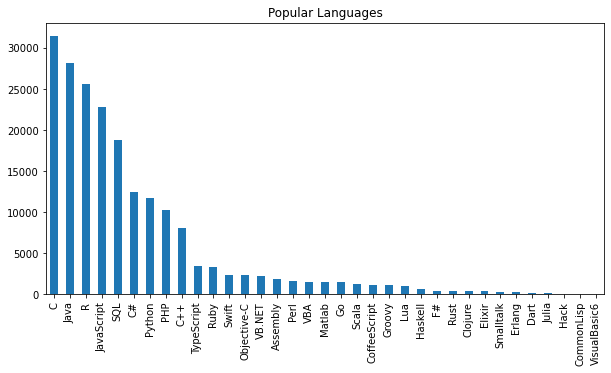

In [23]:
"""Plot Histogram"""
plt.figure(figsize=(10, 5))
plt.title('Popular Languages')
ax = df_1[languages].sum().sort_values(ascending=False).plot(kind='bar')

### Qn2.  Which countries have the most professional developers?

Objective, 
Pinpoint market demands and oportunities, like how to increase the numbers where there is low number of developers

In [24]:
df_3 = df_1.copy()

In [25]:
"""Check null values"""
df_3[['Country','Professional']].isnull().sum()

Country         0
Professional    0
dtype: int64

In [26]:
df_c_q3 = df_3[['Country', 'IsProfessional']].groupby('Country').sum().sort_values(by='IsProfessional',ascending=False)

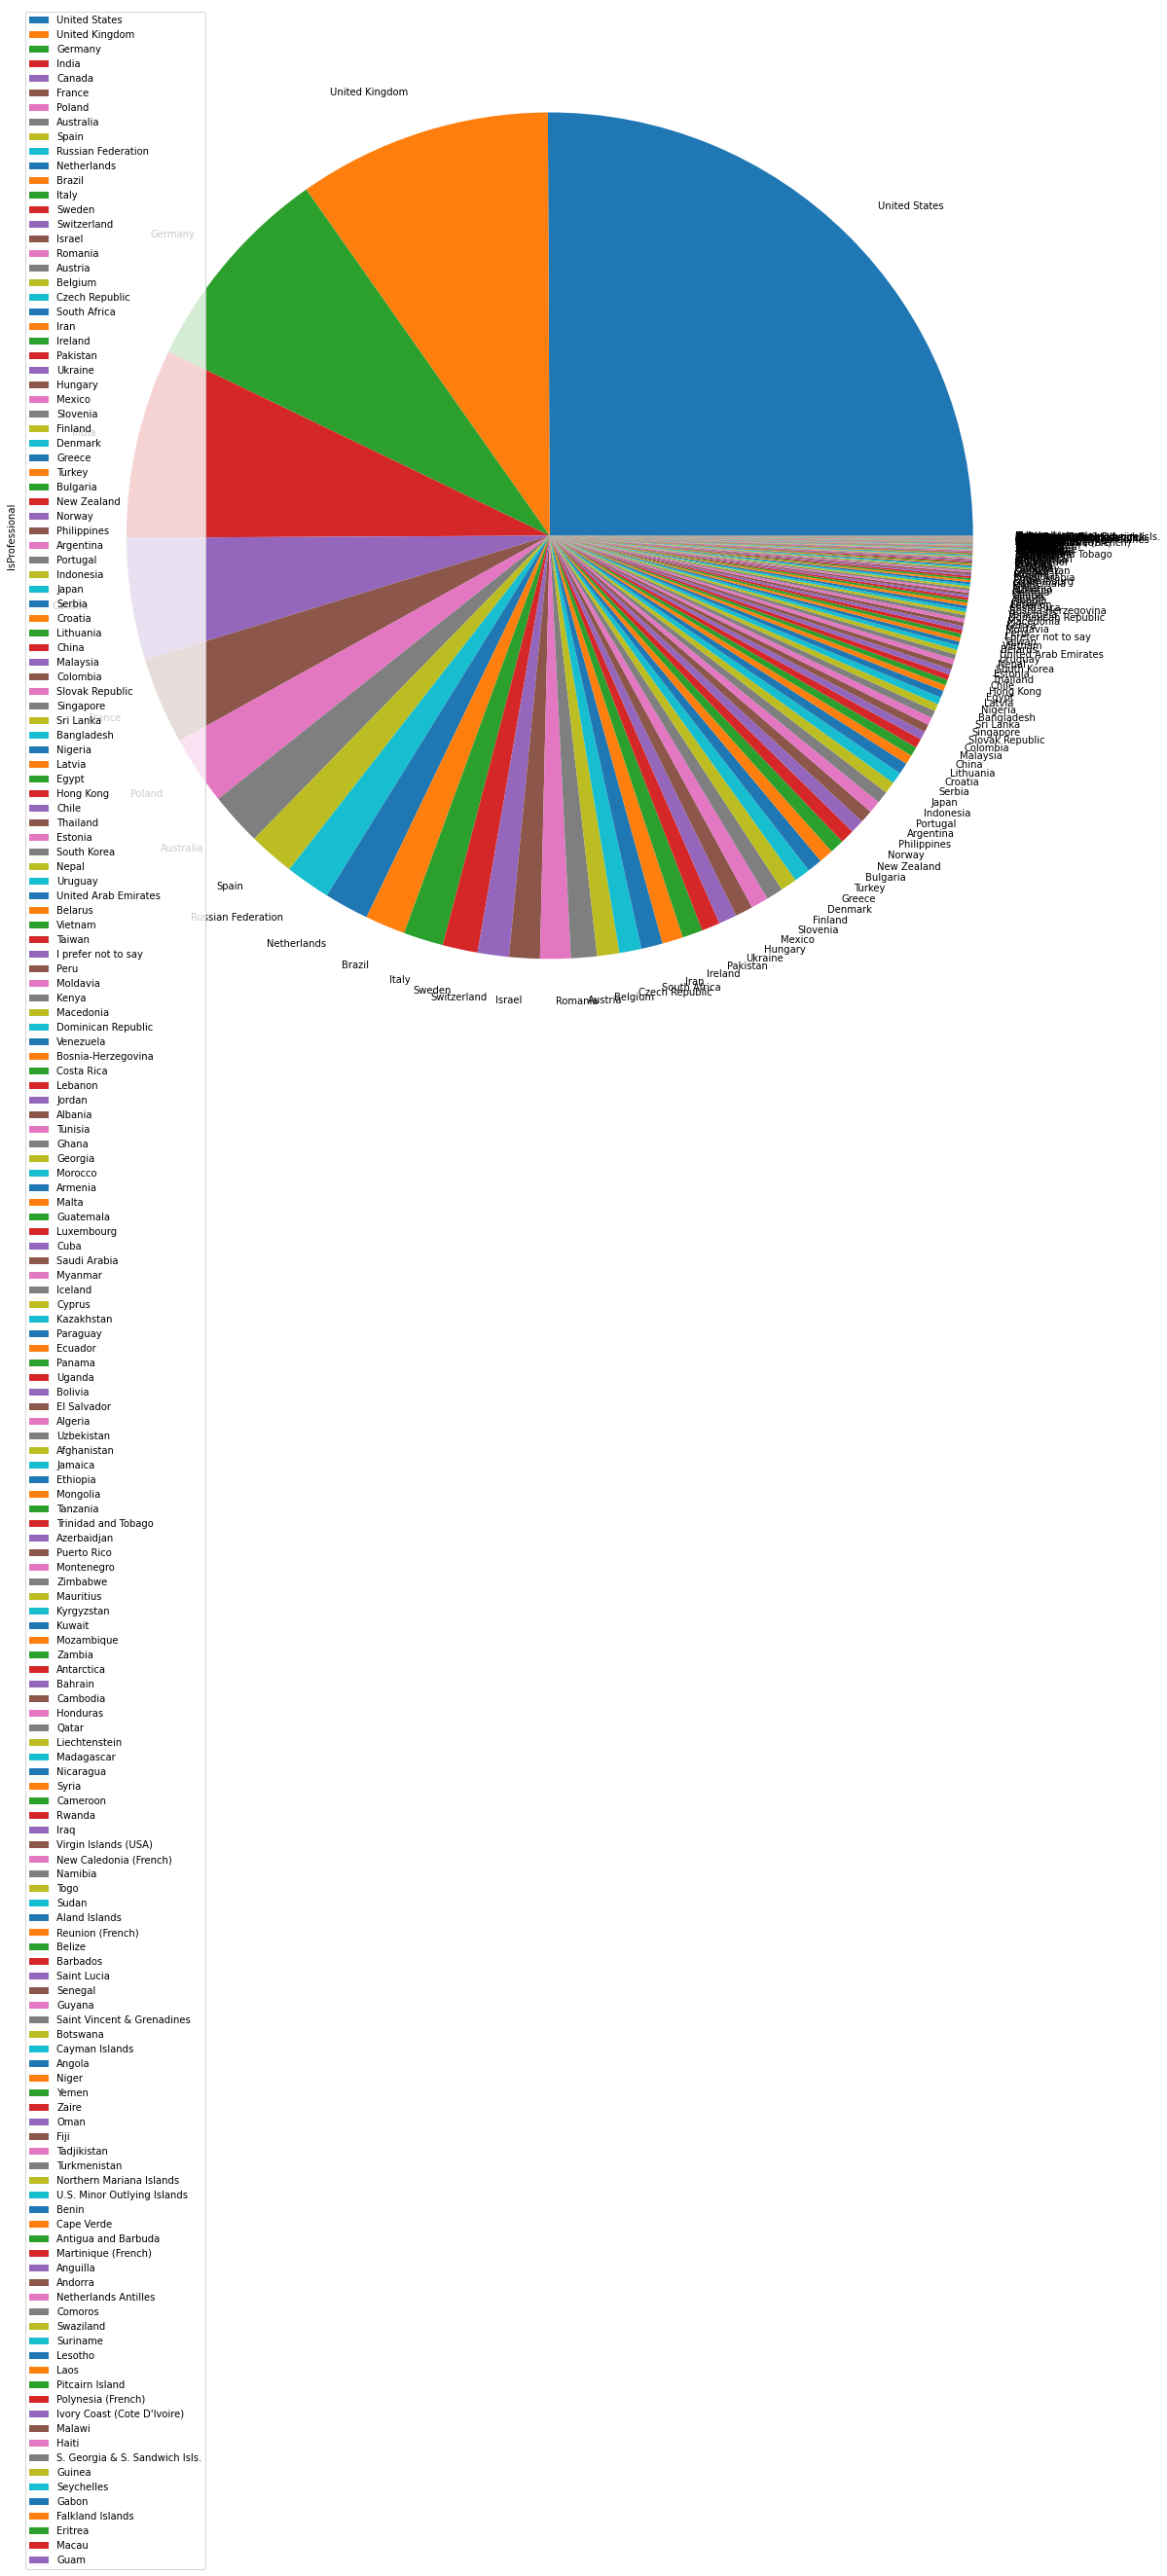

In [27]:
ax = df_c_q3.plot.pie(subplots=True, figsize=(20, 20))